# 🧠 Naive Bayes Classifier
### Siva.Jasthi@metrostate.edu
### Machine Learning and Data Mining
---

## 📋 Learning Objectives

By the end of this notebook, you will be able to:

1. **Explain** Bayes' Theorem and the "naive" independence assumption 🎯
2. **Identify** the 5 variants of Naive Bayes and when to use each one 🔍
3. **Preprocess** data (handle missing values, encode categorical features) 🛠️
4. **Train and evaluate** Naive Bayes classifiers using scikit-learn 📊
5. **Compare** model performance using accuracy, confusion matrix, and classification reports 📈
6. **Choose** the best Naive Bayes variant for a given dataset 🏆

## 🤔 What is Naive Bayes?

Naive Bayes is a **probabilistic classifier** based on **Bayes' Theorem**. It's called "naive" because it assumes that all features are **independent** of each other (which is rarely true in real life, but the algorithm still works surprisingly well! 😄).

### 📐 Bayes' Theorem

$$P(A|B) = \\frac{P(B|A) \\cdot P(A)}{P(B)}$$

In classification terms:

$$P(\\text{class}|\\text{features}) = \\frac{P(\\text{features}|\\text{class}) \\cdot P(\\text{class})}{P(\\text{features})}$$

Where:
- **P(class | features)** = Posterior probability (what we want to find!) — "Given these features, what's the probability of this class?"
- **P(features | class)** = Likelihood — "Given this class, how likely are these features?"
- **P(class)** = Prior probability — "How common is this class overall?"
- **P(features)** = Evidence — "How common are these features overall?"

### 🍕 Simple Example: Pizza or Salad?

Imagine you're trying to predict if a student ordered **Pizza** 🍕 or **Salad** 🥗 based on two features:
- **Is it Friday?** (Yes/No)
- **Is it hot outside?** (Yes/No)

| Day | Is Friday? | Is Hot? | Order |
|-----|-----------|---------|-------|
| 1 | Yes | No | Pizza |
| 2 | No | Yes | Salad |
| 3 | Yes | Yes | Pizza |
| 4 | No | No | Salad |
| 5 | Yes | No | Pizza |
| 6 | No | Yes | Pizza |

**Question:** On a Friday when it's hot, what will the student order?

Using Naive Bayes:
- P(Pizza) = 4/6 = 0.67, P(Salad) = 2/6 = 0.33
- P(Friday=Yes | Pizza) = 3/4 = 0.75
- P(Hot=Yes | Pizza) = 2/4 = 0.50
- P(Friday=Yes | Salad) = 0/2 = 0.00

Since P(Friday=Yes | Salad) = 0, the prediction is **Pizza** 🍕!

## 🔢 The 5 Variants of Naive Bayes

| Variant | Best For | Feature Type | Example Use Case |
|---------|----------|-------------|-----------------|
| **Gaussian NB** | Continuous data | Real-valued (bell curve) | Height, weight, age |
| **Multinomial NB** | Count data | Discrete counts | Word counts in text classification |
| **Bernoulli NB** | Binary data | Yes/No, 0/1 | Spam detection (word present or not) |
| **Complement NB** | Imbalanced data | Discrete counts | When one class has way more samples |
| **Categorical NB** | Categorical data | Categories | Color, size, brand |

### 💡 How to Choose?
- **Numbers that follow a bell curve?** → Gaussian NB
- **Counting things (like words)?** → Multinomial NB
- **Yes/No features?** → Bernoulli NB
- **Imbalanced classes?** → Complement NB
- **Categories (like colors)?** → Categorical NB

In [1]:
#@title 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Naive Bayes Variants
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

# Model Evaluation Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For embedding YouTube videos
from IPython.display import YouTubeVideo, display

# Make plots look nice 🎨
plt.style.use('seaborn-v0_8-colorblind')
sns.set_theme(style="whitegrid")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 📂 Step 2: Load and Explore the Titanic Dataset

We'll use the **Titanic dataset** from [Kaggle](https://www.kaggle.com/c/titanic) — one of the most famous ML datasets!

🚢 **Goal:** Predict whether a passenger **survived** (1) or **did not survive** (0) based on features like age, class, sex, etc.

> **Setup:** Download the Titanic dataset from Kaggle. Rename `test.csv` as `titanic_data.csv` and upload it to the notebook.

In [2]:
#@title 📂 Load and explore the data
# Load the Titanic dataset
titanic_data = pd.read_csv('https://raw.githubusercontent.com/sjasthi/Python-DS-Data-Science/refs/heads/main/datasets/titanic_data.csv')

# Let's look at the first few rows
print("🔍 First 5 rows of the Titanic Dataset:")
display(titanic_data.head())

print(f"\n📊 Dataset Shape: {titanic_data.shape[0]} rows × {titanic_data.shape[1]} columns")
print(f"\n📋 Column Names: {list(titanic_data.columns)}")

🔍 First 5 rows of the Titanic Dataset:


,Id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



📊 Dataset Shape: 1309 rows × 12 columns

📋 Column Names: ['Id', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [3]:
#@title 🔎 Quick Data Exploration
# Check data types and missing values
print("📋 Data Info:")
print(titanic_data.dtypes)

print(f"\n❓ Missing Values:")
print(titanic_data.isnull().sum())

print(f"\n📊 Basic Statistics:")
display(titanic_data.describe())

📋 Data Info:
Id            int64
Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

❓ Missing Values:
Id             0
Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

📊 Basic Statistics:


,Id,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.376623,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484724,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## 📊 Step 3: Visualize the Data (EDA)

Let's explore the data visually before building our models! 🎨

/tmp/ipython-input-380733025.py:45: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-380733025.py:45: UserWarning: Glyph 128107 (\N{MAN AND WOMAN HOLDING HANDS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-380733025.py:45: UserWarning: Glyph 127915 (\N{TICKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128107 (\N{MAN AND WOMAN HOLDING HANDS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127915 (\N{TICKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

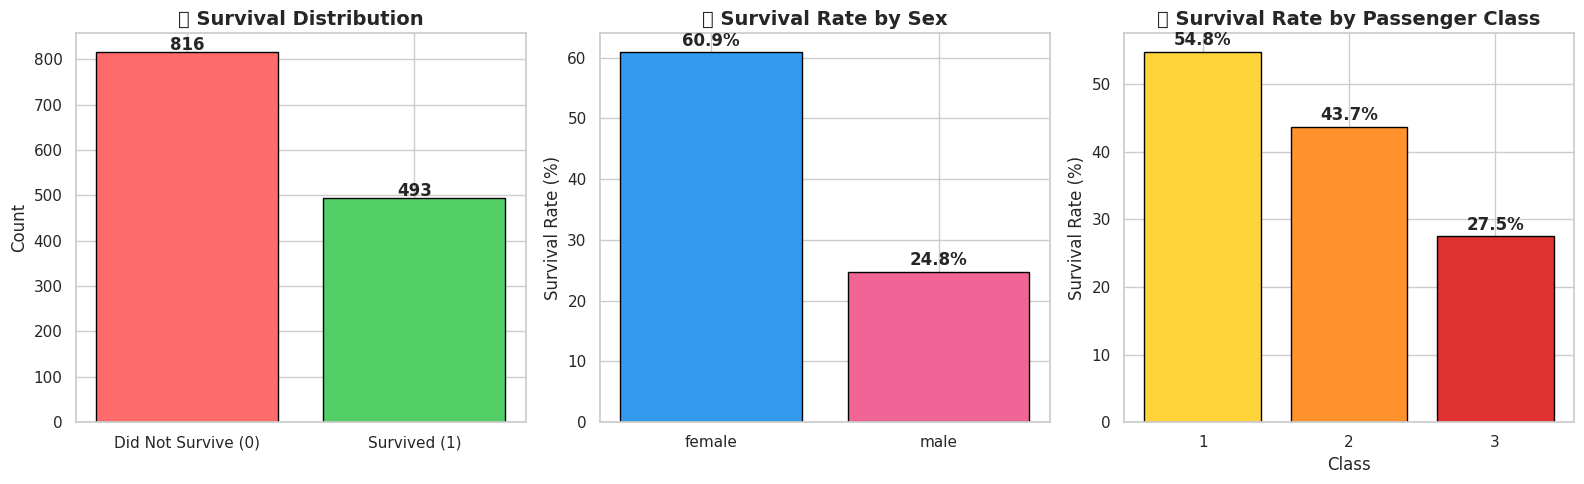

💡 Key Observations:
   - More passengers did NOT survive than survived
   - Women had a MUCH higher survival rate than men
   - First class passengers had the highest survival rate


In [4]:
#@title 📊 Visualize Survival Distribution & Key Features
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Survival Count
survival_counts = titanic_data['Survived'].value_counts()
colors = ['#ff6b6b', '#51cf66']
axes[0].bar(
    ['Did Not Survive (0)', 'Survived (1)'],
    survival_counts.values,
    color=colors,
    edgecolor='black'
)
axes[0].set_title('🎯 Survival Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(survival_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=12)

# Plot 2: Survival by Sex
sex_survival = titanic_data.groupby('Sex')['Survived'].mean()
axes[1].bar(
    sex_survival.index,
    sex_survival.values * 100,
    color=['#339af0', '#f06595'],
    edgecolor='black'
)
axes[1].set_title('👫 Survival Rate by Sex', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)')
for i, v in enumerate(sex_survival.values):
    axes[1].text(i, v * 100 + 1, f'{v*100:.1f}%', ha='center', fontweight='bold', fontsize=12)

# Plot 3: Survival by Pclass
pclass_survival = titanic_data.groupby('Pclass')['Survived'].mean()
axes[2].bar(
    pclass_survival.index.astype(str),
    pclass_survival.values * 100,
    color=['#ffd43b', '#ff922b', '#e03131'],
    edgecolor='black'
)
axes[2].set_title('🎫 Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Survival Rate (%)')
axes[2].set_xlabel('Class')
for i, v in enumerate(pclass_survival.values):
    axes[2].text(i, v * 100 + 1, f'{v*100:.1f}%', ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("💡 Key Observations:")
print("   - More passengers did NOT survive than survived")
print("   - Women had a MUCH higher survival rate than men")
print("   - First class passengers had the highest survival rate")

## 🛠️ Step 4: Data Preprocessing

Before we can train our models, we need to:
1. **Drop** irrelevant columns (names, ticket numbers, etc.)
2. **Fill** missing values
3. **Encode** categorical variables into numbers

> 🤔 **Why?** Machine learning models need **numbers**, not text!

In [5]:
#@title 🛠️ Preprocess the Data
# Make a copy so we don't modify the original
df = titanic_data.copy()

# Step 1: Drop columns that won't help with prediction
# Id, Name, Ticket, Cabin — these are unique identifiers, not useful patterns
df = df.drop(['Id', 'Name', 'Ticket', 'Cabin'], axis=1)
print("✂️ Dropped columns: Id, Name, Ticket, Cabin")

# Step 2: Fill missing values
# Age: Use the median (middle value) — robust to outliers!
df['Age'] = df['Age'].fillna(df['Age'].median())
print(f"🔧 Filled missing 'Age' values with median: {df['Age'].median()}")

# Fare: Use the median (1 missing value)
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
print(f"🔧 Filled missing 'Fare' value with median: {df['Fare'].median()}")

# Embarked: Use the mode (most common value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(f"🔧 Filled missing 'Embarked' values with mode: {df['Embarked'].mode()[0]}")

# Step 3: One-Hot Encoding for categorical variables
# Converts 'male'/'female' → Sex_male (0/1), Sex_female (0/1)
# Converts 'S'/'C'/'Q' → Embarked_S (0/1), Embarked_C (0/1), Embarked_Q (0/1)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

print("\n✅ Preprocessed Data (first 5 rows):")
display(df.head())

print(f"\n📊 Final shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"📋 Columns: {list(df.columns)}")

✂️ Dropped columns: Id, Name, Ticket, Cabin
🔧 Filled missing 'Age' values with median: 28.0
🔧 Filled missing 'Fare' value with median: 14.4542
🔧 Filled missing 'Embarked' values with mode: S

✅ Preprocessed Data (first 5 rows):


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True



📊 Final shape: 1309 rows × 11 columns
📋 Columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


## ✂️ Step 5: Split Data into Training and Testing Sets

We split the data:
- **80% for Training** — the model learns from this 📚
- **20% for Testing** — we evaluate the model on unseen data 🧪

> 🎯 `random_state=42` ensures we get the same split every time (reproducibility!)

In [6]:
#@title ✂️ Split the data
# Separate features (X) from target (y)
X = df.drop('Survived', axis=1)  # Everything except 'Survived'
y = df['Survived']                # Just the 'Survived' column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"📚 Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.0f}%)")
print(f"🧪 Testing set:  {len(X_test)} samples ({len(X_test)/len(X)*100:.0f}%)")
print(f"\n🎯 Target distribution in training set:")
print(f"   Survived:     {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")
print(f"   Not Survived: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")

📚 Training set: 1047 samples (80%)
🧪 Testing set:  262 samples (20%)

🎯 Target distribution in training set:
   Survived:     386 (36.9%)
   Not Survived: 661 (63.1%)


## 🏋️ Step 6: Train and Evaluate All 5 Naive Bayes Variants

Instead of copy-pasting the same code 5 times, we'll use a **loop** — because good programmers follow the **DRY principle** (Don't Repeat Yourself! 😎)

> 🤔 **Think about it:** Which variant do you think will perform best on the Titanic dataset, and why?

In [7]:
#@title 🏋️ Train all 5 Naive Bayes variants
# Define all 5 variants in a dictionary
models = {
    '🔵 Gaussian NB': GaussianNB(),
    '🟢 Multinomial NB': MultinomialNB(),
    '🟡 Bernoulli NB': BernoulliNB(),
    '🟠 Complement NB': ComplementNB(),
    '🔴 Categorical NB': CategoricalNB()
}

# Store results for comparison
results = {}

for name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        results[name] = {
            'accuracy': acc,
            'predictions': y_pred,
            'model': model
        }

        # Print results with a visual bar
        bar = '█' * int(acc * 50)
        print(f"{name:25s} | Accuracy: {acc:.4f} | {bar}")

    except Exception as e:
        print(f"{name:25s} | ⚠️ FAILED — {type(e).__name__}")
        print(f"{'':25s} | Reason: {str(e)[:80]}")
        print(f"{'':25s} | 💡 CategoricalNB needs purely categorical features (e.g., 0,1,2)")
        print(f"{'':25s} |    Our dataset has continuous features like Age & Fare,")
        print(f"{'':25s} |    so unseen values in the test set cause an IndexError.")
        print()

print(f"\n✅ {len(results)} out of {len(models)} models trained successfully!")

🔵 Gaussian NB             | Accuracy: 0.6756 | █████████████████████████████████
🟢 Multinomial NB          | Accuracy: 0.6565 | ████████████████████████████████
🟡 Bernoulli NB            | Accuracy: 0.6947 | ██████████████████████████████████
🟠 Complement NB           | Accuracy: 0.6489 | ████████████████████████████████
🔴 Categorical NB          | ⚠️ FAILED — IndexError
                          | Reason: index 80 is out of bounds for axis 1 with size 77
                          | 💡 CategoricalNB needs purely categorical features (e.g., 0,1,2)
                          |    Our dataset has continuous features like Age & Fare,
                          |    so unseen values in the test set cause an IndexError.


✅ 4 out of 5 models trained successfully!


## 🔍 Step 7: Detailed Evaluation — Confusion Matrix & Classification Report

**Accuracy alone isn't enough!** Let's look at:
- **Confusion Matrix** — Shows exactly where the model gets confused 😵
- **Classification Report** — Precision, Recall, F1-Score for each class

### 📖 Reading a Confusion Matrix:
```
                  Predicted
                 0       1
Actual  0    [TN]    [FP]    ← True Negatives & False Positives
        1    [FN]    [TP]    ← False Negatives & True Positives
```
- **TN (True Negative):** Correctly predicted "did not survive" ✅
- **TP (True Positive):** Correctly predicted "survived" ✅
- **FP (False Positive):** Predicted "survived" but actually didn't ❌ (Type I error)
- **FN (False Negative):** Predicted "did not survive" but actually survived ❌ (Type II error)

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/i

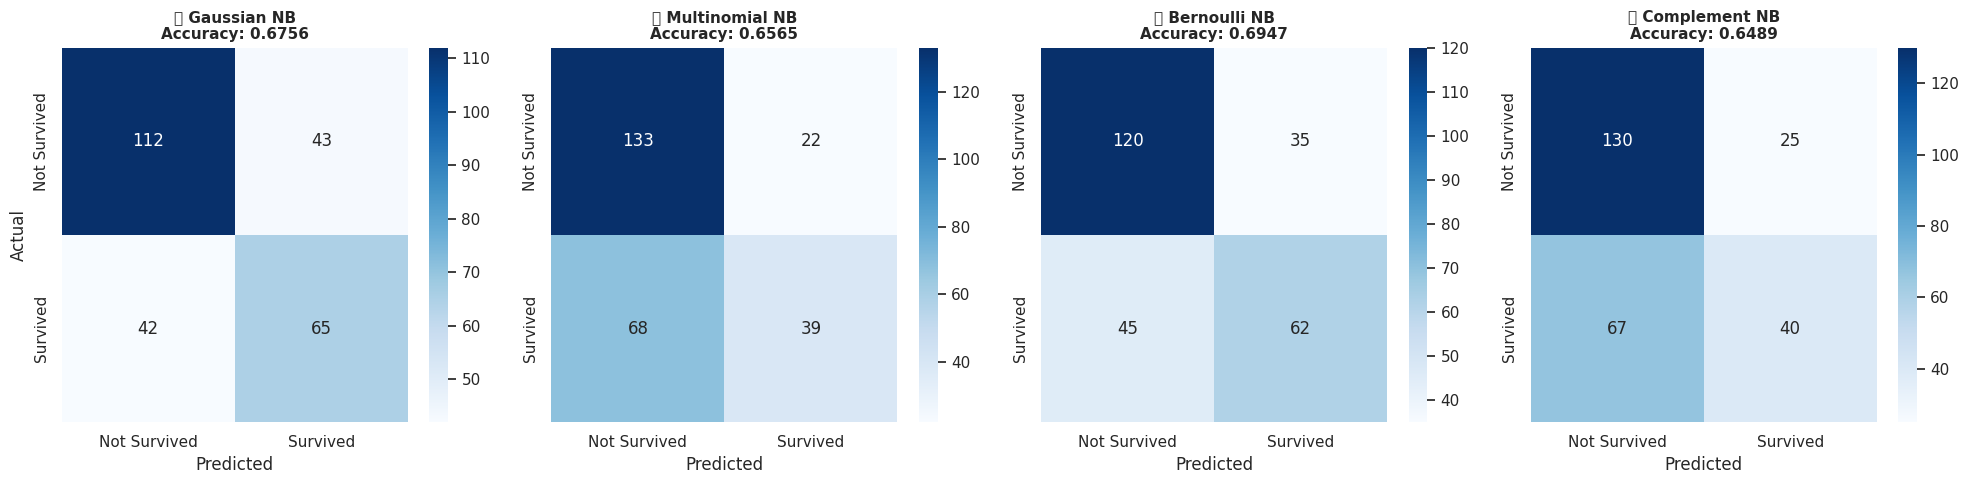

In [8]:
#@title 📊 Confusion Matrices for All Models
n_models = len(results)
fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 5))
if n_models == 1:
    axes = [axes]

for idx, (name, data) in enumerate(results.items()):
    cm = confusion_matrix(y_test, data['predictions'])
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[idx],
        xticklabels=['Not Survived', 'Survived'],
        yticklabels=['Not Survived', 'Survived']
    )
    axes[idx].set_title(
        f'{name}\nAccuracy: {data["accuracy"]:.4f}',
        fontsize=11,
        fontweight='bold'
    )
    axes[idx].set_ylabel('Actual' if idx == 0 else '')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

In [9]:
#@title 📋 Classification Reports
for name, data in results.items():
    print(f"\n{'='*60}")
    print(f"  {name}")
    print(f"{'='*60}")
    print(classification_report(
        y_test,
        data['predictions'],
        target_names=['Not Survived', 'Survived']
    ))


  🔵 Gaussian NB
              precision    recall  f1-score   support

Not Survived       0.73      0.72      0.72       155
    Survived       0.60      0.61      0.60       107

    accuracy                           0.68       262
   macro avg       0.66      0.67      0.66       262
weighted avg       0.68      0.68      0.68       262


  🟢 Multinomial NB
              precision    recall  f1-score   support

Not Survived       0.66      0.86      0.75       155
    Survived       0.64      0.36      0.46       107

    accuracy                           0.66       262
   macro avg       0.65      0.61      0.61       262
weighted avg       0.65      0.66      0.63       262


  🟡 Bernoulli NB
              precision    recall  f1-score   support

Not Survived       0.73      0.77      0.75       155
    Survived       0.64      0.58      0.61       107

    accuracy                           0.69       262
   macro avg       0.68      0.68      0.68       262
weighted avg       

## 📈 Step 8: Compare All Models Side by Side

/tmp/ipython-input-3119734369.py:45: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3119734369.py:45: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3119734369.py:45: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3119734369.py:45: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3119734369.py:45: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12830

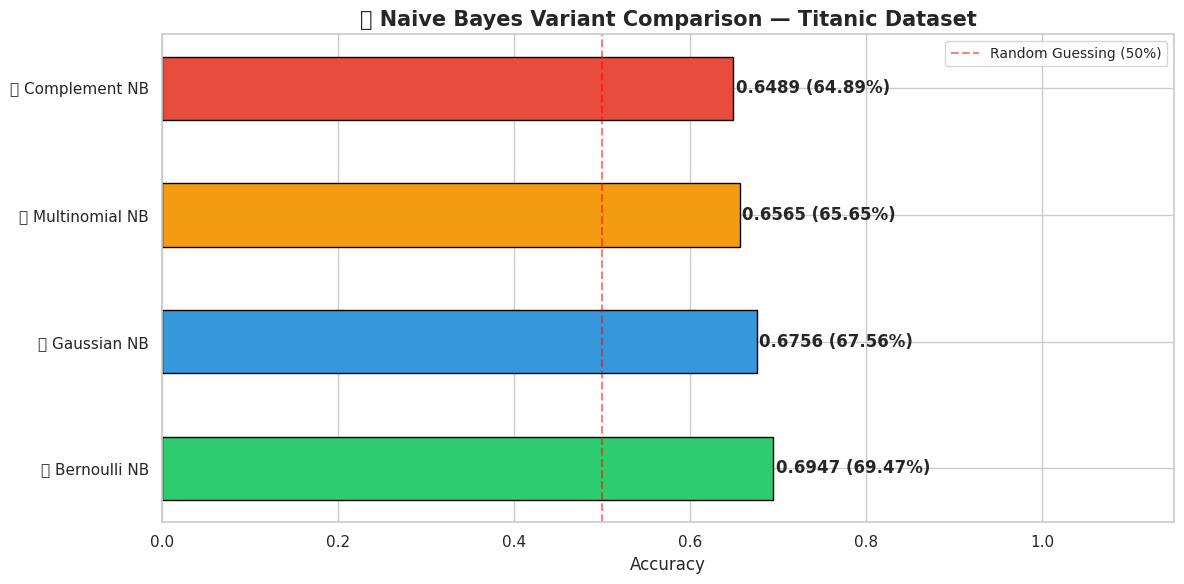


🏆 Best Model: 🟡 Bernoulli NB with accuracy 0.6947 (69.47%)


In [10]:
#@title 📈 Visual Comparison of All Models
# Create a comparison bar chart
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

# Sort by accuracy
sorted_pairs = sorted(
    zip(model_names, accuracies),
    key=lambda x: x[1],
    reverse=True
)
sorted_names, sorted_acc = zip(*sorted_pairs)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#9b59b6']
bars = ax.barh(
    sorted_names,
    sorted_acc,
    color=colors,
    edgecolor='black',
    height=0.5
)

# Add value labels
for bar, acc in zip(bars, sorted_acc):
    ax.text(
        bar.get_width() + 0.003,
        bar.get_y() + bar.get_height() / 2,
        f'{acc:.4f} ({acc*100:.2f}%)',
        va='center',
        fontweight='bold',
        fontsize=12
    )

ax.set_xlim(0, 1.15)
ax.set_xlabel('Accuracy', fontsize=12)
ax.set_title(
    '🏆 Naive Bayes Variant Comparison — Titanic Dataset',
    fontsize=15,
    fontweight='bold'
)
ax.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Random Guessing (50%)')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Print the winner
best_model = sorted_names[0]
best_acc = sorted_acc[0]
print(f"\n🏆 Best Model: {best_model} with accuracy {best_acc:.4f} ({best_acc*100:.2f}%)")

## 🎯 Step 9: Making Predictions on Individual Passengers

Let's use our best model to predict survival for specific passengers! This shows how the model would be used in practice.

In [11]:
#@title 🎯 Predict for individual passengers
# Use the best model (Gaussian NB, typically)
best_nb = results[sorted_names[0]]['model']

print("🔮 Predictions for individual test passengers:\n")

for i in range(min(5, len(X_test))):
    sample = X_test.iloc[i:i+1]
    prediction = best_nb.predict(sample)[0]
    probability = best_nb.predict_proba(sample)[0]
    actual = y_test.iloc[i]

    status = "✅" if prediction == actual else "❌"
    survived_text = "Survived 🟢" if prediction == 1 else "Did Not Survive 🔴"
    actual_text = "Survived" if actual == 1 else "Did Not Survive"

    print(f"  Passenger {i+1}: Predicted = {survived_text}")
    print(f"    Probability: Not Survived: {probability[0]:.2%} | Survived: {probability[1]:.2%}")
    print(f"    Actual: {actual_text} {status}")
    print()

🔮 Predictions for individual test passengers:

  Passenger 1: Predicted = Did Not Survive 🔴
    Probability: Not Survived: 89.77% | Survived: 10.23%
    Actual: Survived ❌

  Passenger 2: Predicted = Did Not Survive 🔴
    Probability: Not Survived: 89.77% | Survived: 10.23%
    Actual: Survived ❌

  Passenger 3: Predicted = Did Not Survive 🔴
    Probability: Not Survived: 89.77% | Survived: 10.23%
    Actual: Survived ❌

  Passenger 4: Predicted = Did Not Survive 🔴
    Probability: Not Survived: 89.77% | Survived: 10.23%
    Actual: Did Not Survive ✅

  Passenger 5: Predicted = Survived 🟢
    Probability: Not Survived: 21.71% | Survived: 78.29%
    Actual: Did Not Survive ❌



## 🎓 Key Takeaways

1. **Naive Bayes is fast and simple** — great as a baseline model! ⚡
2. **The "naive" assumption** (feature independence) is usually violated, but the algorithm still works well in practice 🤷
3. **Choosing the right variant matters** — match the variant to your data type:
   - Continuous features → Gaussian NB
   - Text/count data → Multinomial NB
   - Binary features → Bernoulli NB
   - Imbalanced datasets → Complement NB
   - Categorical features → Categorical NB
4. **Always look beyond accuracy** — Confusion matrix and classification report tell a richer story 📊
5. **Preprocessing is crucial** — Handle missing values and encode categories before training 🛠️

### 🤔 Discussion Questions:
1. Why did some variants perform better than others on the Titanic dataset?
2. What would happen if we added more features? Would that help or hurt Naive Bayes?
3. Can you think of a real-world application where Naive Bayes would be the best choice?
4. What is the impact of the "naive" assumption on real-world datasets?

## 🚀 Challenge: Try It Yourself!

Modify the code below to experiment:
1. Change `test_size` to 0.3 — does accuracy change?
2. Try **NOT** dropping the 'Fare' column — does it help?
3. Add `from sklearn.preprocessing import StandardScaler` and scale the features before training Gaussian NB
4. Try the Iris dataset: `from sklearn.datasets import load_iris`

In [12]:
#@title 🚀 Your Experimentation Space
# 👇 Try your experiments here!

# Example: Load Iris dataset and try Gaussian NB
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = iris.target

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris,
    test_size=0.2,
    random_state=42
)

gnb = GaussianNB()
gnb.fit(X_train_iris, y_train_iris)
y_pred_iris = gnb.predict(X_test_iris)

print(f"🌸 Iris Dataset — Gaussian NB Accuracy: {accuracy_score(y_test_iris, y_pred_iris):.4f}")
print(f"\n📋 Classification Report:")
print(classification_report(
    y_test_iris,
    y_pred_iris,
    target_names=iris.target_names
))

🌸 Iris Dataset — Gaussian NB Accuracy: 1.0000

📋 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 📚 References & Video Resources

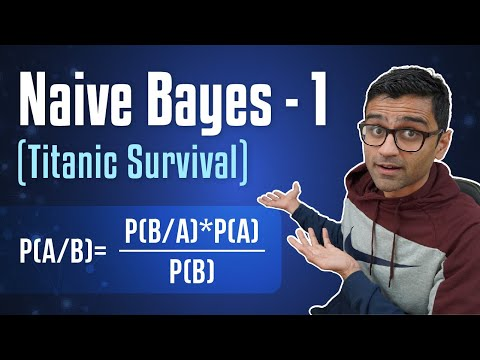

In [13]:
#@title 🎬 Naive Bayes Classifier Algorithm — Code Basics
YouTubeVideo('PPeaRc-r1OI', width="840", height="472.5")

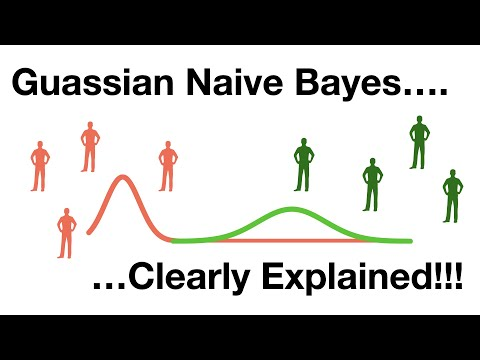

In [14]:
#@title 🎬 Gaussian Naive Bayes Classifier
YouTubeVideo('H3EjCKtlVog', width="840", height="472.5")

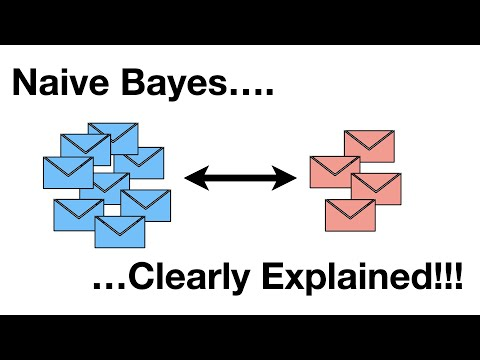

In [15]:
#@title 🎬 Naive Bayes Classifier (Multinomial)
YouTubeVideo('O2L2Uv9pdDA', width="840", height="472.5")